In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import acquire
import wrangling

Let's set up an example scenario as perspective for our regression exercises using the Zillow dataset.


As a Codeup data science graduate, you want to show off your skills to the Zillow data science team in hopes of getting an interview for a position you saw pop up on LinkedIn. You thought it might look impressive to build an end-to-end project in which you use some of their Kaggle data to predict property values using some of their available features; who knows, you might even do some feature engineering to blow them away. Your goal is to predict the values of single unit properties using the obervations from 2017.


In these exercises, you will complete the first step toward the above goal: acquire and prepare the necessary Zillow data from the zillow database in the Codeup database server.



#1 Acquire bedroomcnt, bathroomcnt, calculatedfinishedsquarefeet, taxvaluedollarcnt, yearbuilt, taxamount, and fips from the zillow database for all 'Single Family Residential' properties.


In [7]:
df = wrangling.get_zillow()

In [8]:
df.head()

,bedrooms,bathrooms,square_ft,tax_value,built,taxamount,fips
4,4,2.0,3633,296425,2005,6941.39,6037
6,3,4.0,1620,847770,2011,10244.94,6037
7,3,2.0,2077,646760,1926,7924.68,6037
11,0,0.0,1200,5328,1972,91.60,6037
14,0,0.0,171,6920,1973,255.17,6037


#2 Using your acquired Zillow data, walk through the summarization and cleaning steps in your wrangle.ipynb file like we did above. You may handle the missing values however you feel is appropriate and meaningful; remember to document your process and decisions using markdown and code commenting where helpful.


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,2152863.0,1.076431e+06,621478.160628,0.00,538215.50,1076431.00,1614646.50,2152862.00
bedroomcnt,2152852.0,3.287196e+00,0.954754,0.00,3.00,3.00,4.00,25.00
bathroomcnt,2152852.0,2.230688e+00,0.999280,0.00,2.00,2.00,3.00,32.00
calculatedfinishedsquarefeet,2144379.0,1.862855e+03,1222.125124,1.00,1257.00,1623.00,2208.00,952576.00
taxvaluedollarcnt,2152370.0,4.618962e+05,699676.049600,1.00,188170.25,327671.00,534527.00,98428909.00
yearbuilt,2143526.0,1.960950e+03,22.162196,1801.00,1949.00,1958.00,1976.00,2016.00
taxamount,2148421.0,5.634866e+03,8178.910249,1.85,2534.98,4108.95,6414.32,1337755.86
fips,2152863.0,6.048377e+03,20.433292,6037.00,6037.00,6037.00,6059.00,6111.00


In [5]:
df.shape

(2152863, 8)

In [6]:
df.isna().sum()

Unnamed: 0                         0
bedroomcnt                        11
bathroomcnt                       11
calculatedfinishedsquarefeet    8484
taxvaluedollarcnt                493
yearbuilt                       9337
taxamount                       4442
fips                               0
dtype: int64

In [7]:
df.dtypes

Unnamed: 0                        int64
bedroomcnt                      float64
bathroomcnt                     float64
calculatedfinishedsquarefeet    float64
taxvaluedollarcnt               float64
yearbuilt                       float64
taxamount                       float64
fips                            float64
dtype: object

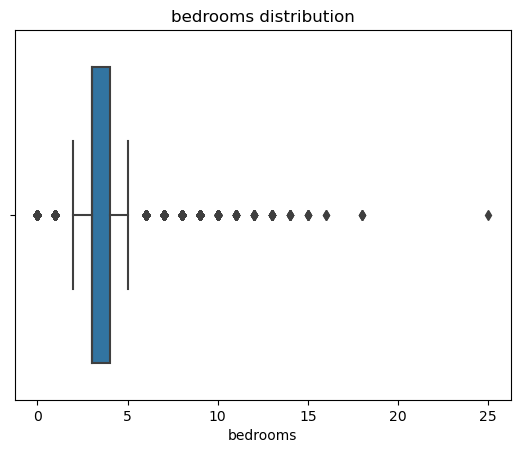

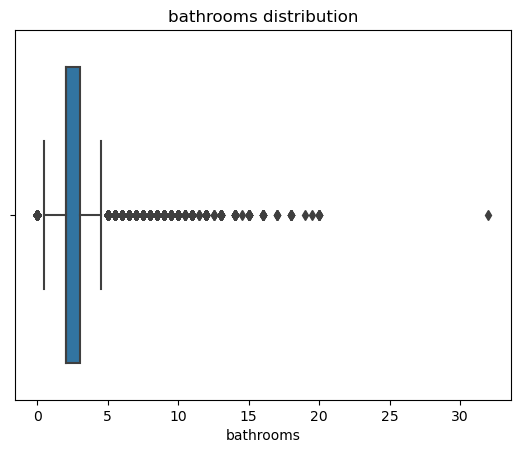

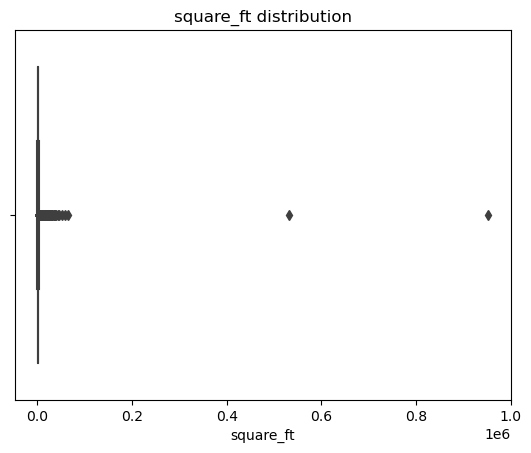

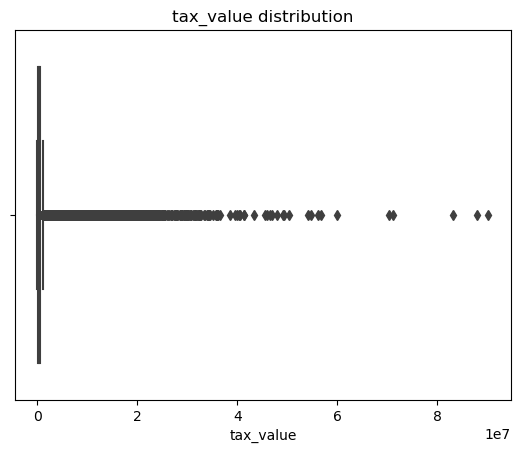

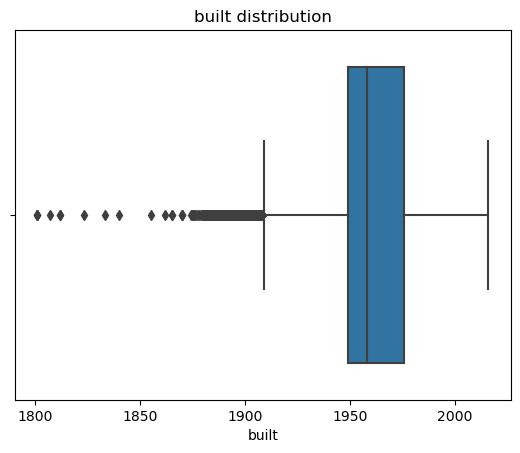

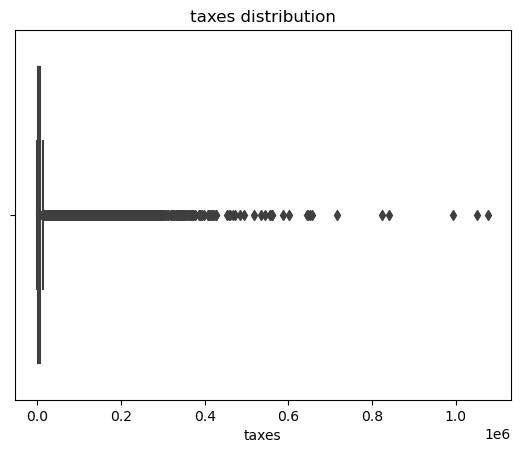

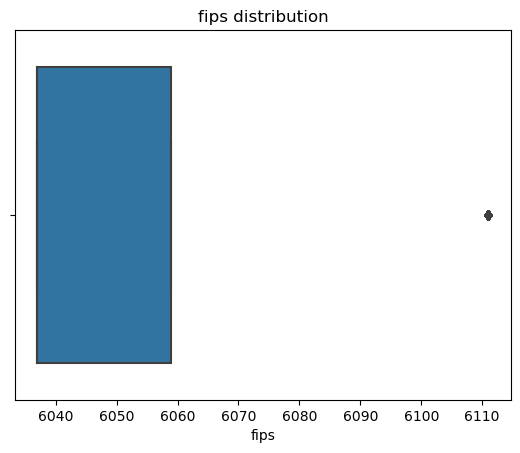

In [19]:
#solid way to visualize outliers
for col in df.columns:
    
    sns.boxplot(x=col, data=df)
    plt.title(f'{col} distribution')
    plt.show()

- Since we are working with such a huge dataset, the roughly 12,000 rows we lose from dropping the nulls seemed reasonable. None of the missing values struck me as important enough to try to impute the mean or median to avoid dropping. There *are* some outliers, but at this point I'm somewhat unsure as to how to deal with them. 

#3 Store all of the necessary functions to automate your process from acquiring the data to returning a cleaned dataframe with no missing values in your wrangle.py file. Name your final function wrangle_zillow.


In [ ]:
def wrangle_zillow(df):
    '''
    This function will, using an already existing DataFrame, clean the zillow_2017.csv created with my acquire function to make it ready to be split and explored.
    '''
    df = df.drop(columns='Unnamed: 0')
    df = df.dropna()
    
    df.bedroomcnt = df.bedroomcnt.astype(int)
    df.calculatedfinishedsquarefeet = df.calculatedfinishedsquarefeet.astype(int)
    df.taxvaluedollarcnt = df.taxvaluedollarcnt.astype(int)
    df.yearbuilt = df.yearbuilt.astype(int)
    df.fips = df.fips.astype(int)
    
    df = df.rename(columns= {'bedroomcnt': 'bedrooms',
                             'bathroomcnt': 'bathrooms',
                             'calculatedfinishedsquarefeet': 'square_ft',
                             'taxvaluedollarcnt':'tax_value',
                             'yearbuilt':'built',
                             'taxamaount':'taxes'
                             })
        
    return df

In [16]:
df = df.rename(columns= {'bedroomcnt': 'bedrooms',
           'bathroomcnt': 'bathrooms',
           'calculatedfinishedsquarefeet': 'square_ft',
           'taxvaluedollarcnt':'tax_value',
           'yearbuilt':'built',
           'taxamount':'taxes'
           })

In [5]:
df = wrangling.wrangle_zillow(df)

In [18]:
df.head()

,bedrooms,bathrooms,square_ft,tax_value,built,taxes,fips
4,4,2.0,3633,296425,2005,6941.39,6037
6,3,4.0,1620,847770,2011,10244.94,6037
7,3,2.0,2077,646760,1926,7924.68,6037
11,0,0.0,1200,5328,1972,91.60,6037
14,0,0.0,171,6920,1973,255.17,6037
